## Code for 1D Simulation of Exclusive Active Matter in the Hydrodynamic Limit 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba.experimental import jitclass
from numba import njit
import dim_one_sim  

We can write our own potential as follows:

In [2]:
def create_V_centered_hump(epsilon):
    center = 0.5
    d = 0.02

    def V_centered_hump(x):
        return np.where(
            np.abs(x - center) <= d,
            (1 + np.cos(np.pi / d * (x - center))) * epsilon,
            0.0
        )
    
    return V_centered_hump

def V_flat(x):
    return np.zeros(x.shape)

And then execute simulations like this:

In [ ]:
N_x = 200
epsilon=0.6
test_f = dim_one_sim.f(N_x=N_x, N_theta=6, V= create_V_centered_hump(epsilon=epsilon) )
test_f.set_random(phi=0.6, delta=0.1)
test_f.evolve_to_time(t=5.0, recording_steps=1.0/200)
test_f.plot_history(y_breaks = 1, x_breaks=2)
plt.title(f't = 3.0, $\epsilon=${epsilon}')
plt.show() 

Let's run some longer simulations:

In [7]:
N_x = 200

profiles_all = []
vapour = []
bulk = []
AS = []
epsilon_space = np.linspace(0.0, 3.0, 50)
for e in epsilon_space:
    vapour_concs = []
    bulk_concs = []
    asys = []
    profiles=[]
    for repeat in range(20):
        test_f = dim_one_sim.f(N_x=N_x, N_theta=6, V= create_V_centered_hump(epsilon=e) )
        test_f.set_random(phi=0.6, delta=0.1)

        t_finish = 10.0
        test_f.evolve_to_time(t=t_finish, recording_steps=t_finish/200)

        final_rho = test_f.history_rho[-1]

        asymmetry = test_f.rho_asymmetry(final_rho)
        bulk_conc = np.max(final_rho)
        vapour_conc = min(min(final_rho[0:95]), min(final_rho[105:200]))

        asys.append(asymmetry)
        bulk_concs.append(bulk_conc)
        vapour_concs.append(vapour_conc)
        profiles.append(final_rho)
    
    vapour.append(vapour_concs)
    bulk.append(bulk_concs)
    AS.append(asys)
    profiles_all.append(profiles)

np.save('AS', np.array(AS))
np.save('vapour', np.array(vapour))
np.save('bulk', np.array(bulk))


/Users/noahgrodzinski/My Drive/PhD/Active Interfaces/Numerics_1D/Fast Simulations/dim_one_sim.py:231: RuntimeWarning: invalid value encountered in multiply
  self.f[1:-1, :] += df_dt_ * delta_t


In [11]:
np.save('profiles_all', np.array(profiles_all))

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_42084/2362447909.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Asymmetry at Steady State \n $\phi_0 = 0.6$ and Pe$=40$')


Text(0.5, 1.0, 'Asymmetry at Steady State \n $\\phi_0 = 0.6$ and Pe$=40$')

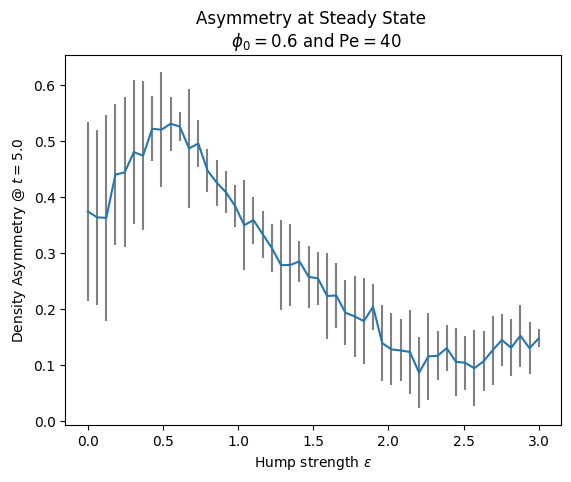

In [10]:
plt.errorbar(epsilon_space, np.mean(np.array(AS), axis=1), yerr=np.std(np.array(AS), axis=1), ecolor='grey')
#plt.plot(np.linspace(0.0, 3.0, 3), np.mean(np.array(AS), axis=1))
plt.xlabel(r'Hump strength $\epsilon$')
plt.ylabel(r'Density Asymmetry @ $t=5.0$')
plt.title('Asymmetry at Steady State \n $\phi_0 = 0.6$ and Pe$=40$')

<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_42084/2718281239.py:4: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Phase Densities $\phi$ at Steady State \n $\phi_0 = 0.7$ and Pe$=40$')


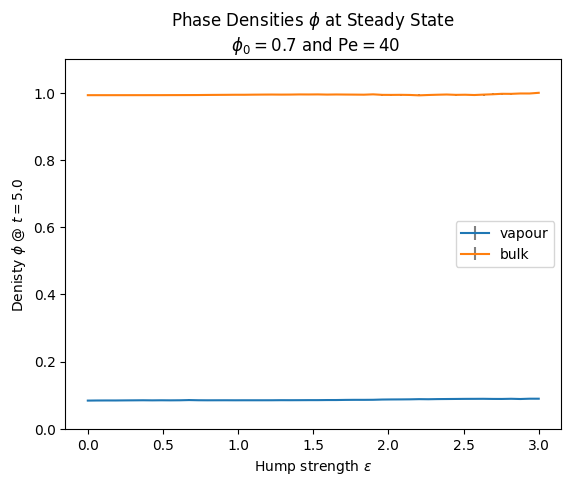

In [9]:
plt.errorbar(epsilon_space, np.mean(np.array(vapour), axis=1), yerr=np.std(np.array(vapour), axis=1), ecolor='grey', label='vapour')
plt.errorbar(epsilon_space, np.mean(np.array(bulk), axis=1), yerr=np.std(np.array(bulk), axis=1), ecolor='grey', label='bulk')
plt.legend()
plt.title('Phase Densities $\phi$ at Steady State \n $\phi_0 = 0.7$ and Pe$=40$')
#plt.plot(np.linspace(0.0, 3.0, 3), np.mean(np.array(AS), axis=1))
plt.xlabel(r'Hump strength $\epsilon$')
plt.ylabel(r'Denisty $\phi$ @ $t=5.0$')
plt.ylim(bottom=0.0, top=1.1)
plt.show()

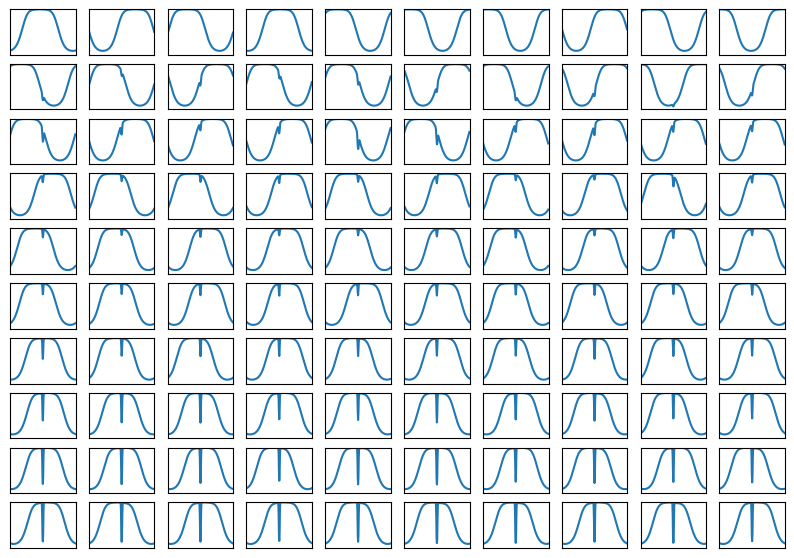

In [37]:
figure, axis = plt.subplots(10, 10)
for row in range(10):
    for col in range(10):
        axis[row, col].plot(profiles_all[row*5][col])
        axis[row, col].set_ylim(bottom=0, top=1)
        axis[row, col].set_xlim(left=0, right=200)
        axis[row, col].set_xticks([])
        axis[row, col].set_yticks([])

figure.set_figwidth(10)
figure.set_figheight(7)
plt.show()